<a href="https://colab.research.google.com/github/JOCRZ/Data-Science-Diploma/blob/main/GraduateAdmissionPrediction(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admission Prediction using ANN
Regression Problem

In [127]:
import pandas as pd
import numpy as np

In [128]:
data = pd.read_csv('/content/drive/MyDrive/DL Notebooks/Dataset/Admission_Predict_Ver1.1.csv')

In [129]:
data = data.drop(columns=['Serial No.'])

In [130]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
199,313,107,3,4.0,4.5,8.69,0,0.72
432,324,112,4,4.5,4.0,9.22,1,0.86
131,303,105,5,5.0,4.5,8.65,0,0.77
192,322,114,5,4.5,4.0,8.94,1,0.86
154,326,108,3,3.0,3.5,8.89,0,0.80


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [132]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(400, 7) (400,) (100, 7) (100,)


In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [152]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) # since regression output activation need to be linear


In [153]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [155]:
history = model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 20ms/step - loss: 0.1638 - accuracy: 0.0000e+00 - val_loss: 0.1462 - val_accuracy: 0.0000e+00
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1356 - accuracy: 0.0000e+00 - val_loss: 0.1284 - val_accuracy: 0.0000e+00
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.0000e+00 - val_loss: 0.1118 - val_accuracy: 0.0000e+00
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1059 - accuracy: 0.0000e+00 - val_loss: 0.0965 - val_accuracy: 0.0000e+00
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.0000e+00 - val_loss: 0.0815 - val_accuracy: 0.0000e+00
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.0000e+00 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.0000e+00 - val_los

In [156]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [157]:
from sklearn.metrics import  r2_score
r2_score(y_test,y_pred)

0.6851347688484507

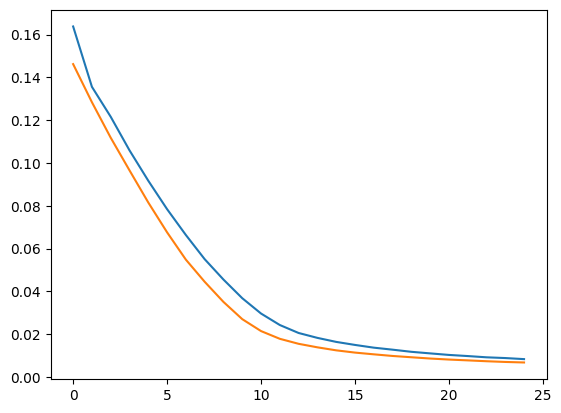

In [158]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

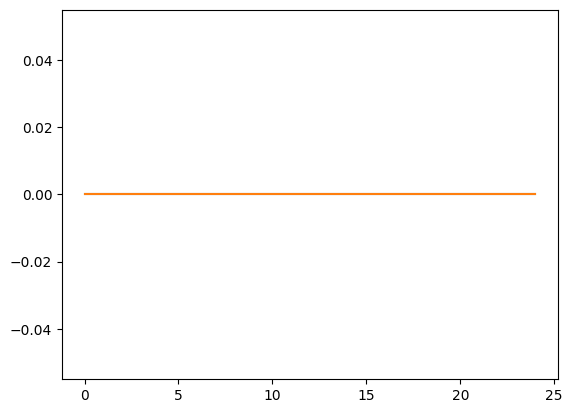

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])